In [6]:
#Importing required libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#Reading the matches csv file of the data
matches=pd.read_csv('C:/Users/ACER/Downloads/matches.csv')

In [51]:
#Reading the deliveries csv file of the data
deliveries=pd.read_csv('C:/Users/ACER/Downloads/deliveries.csv')

In [36]:
#Head function is used to see first 5 rows of our data
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [52]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [38]:
#info function is used to see null values and the data type of each column in data table
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

DATA CLEANING

In [39]:
# Handling missing values (Example: Dropping rows or filling columns with missing data)

"""
after going through the data i got to know that only of dubai international cricket stadium, 
the city data was not present. So as we know that this stadium is present in dubai so i filled those null values with Dubai city
"""
matches['city'].fillna('Dubai', inplace=True)

#there is not a single data is present in umpire3 column so there is no use of this column
matches.drop(columns=['umpire3'], inplace=True)

#There were 3 matches whose result was "no result" thats why there were no winner and no player of the match for those matches.
matches['winner'].fillna('Unknown', inplace=True) 
matches['player_of_match'].fillna('Unknown', inplace=True) 

matches['umpire1'].fillna('Unknown', inplace=True) 
matches['umpire2'].fillna('Unknown', inplace=True) 


C:\Users\ACER\AppData\Local\Temp\ipykernel_16612\2584684072.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['city'].fillna('Dubai', inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_16612\2584684072.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [40]:
#after handling null values in matches data table now we can see there is no null values
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               636 non-null    int64 
 1   season           636 non-null    int64 
 2   city             636 non-null    object
 3   date             636 non-null    object
 4   team1            636 non-null    object
 5   team2            636 non-null    object
 6   toss_winner      636 non-null    object
 7   toss_decision    636 non-null    object
 8   result           636 non-null    object
 9   dl_applied       636 non-null    int64 
 10  winner           636 non-null    object
 11  win_by_runs      636 non-null    int64 
 12  win_by_wickets   636 non-null    int64 
 13  player_of_match  636 non-null    object
 14  venue            636 non-null    object
 15  umpire1          636 non-null    object
 16  umpire2          636 non-null    object
dtypes: int64(5), object(12)
memory usag

In [41]:
matches.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [42]:
#Converting date column to date datatype 
matches['date']=pd.to_datetime(matches['date'], errors='coerce')

In [43]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               636 non-null    int64         
 1   season           636 non-null    int64         
 2   city             636 non-null    object        
 3   date             636 non-null    datetime64[ns]
 4   team1            636 non-null    object        
 5   team2            636 non-null    object        
 6   toss_winner      636 non-null    object        
 7   toss_decision    636 non-null    object        
 8   result           636 non-null    object        
 9   dl_applied       636 non-null    int64         
 10  winner           636 non-null    object        
 11  win_by_runs      636 non-null    int64         
 12  win_by_wickets   636 non-null    int64         
 13  player_of_match  636 non-null    object        
 14  venue            636 non-null    object   

In [53]:
# Now handling null values in deliveries data table
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [54]:
deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [55]:
#There are only 3 columns which contains null values that too because not on every ball dismissal happen so filling those null values with No dismissal
deliveries['player_dismissed'].fillna('No Dismissal', inplace=True)

deliveries['dismissal_kind'].fillna('No Dismissal', inplace=True)

deliveries['fielder'].fillna('No Dismissal', inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_16612\2226586542.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  deliveries['player_dismissed'].fillna('No Dismissal', inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_16612\2226586542.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [56]:
deliveries.isna().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

DATA UNDERSTANDING

In [57]:
#To check the data types of each column dtypes function is used
deliveries.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [58]:
#Overall information about our data
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               636 non-null    int64         
 1   season           636 non-null    int64         
 2   city             636 non-null    object        
 3   date             636 non-null    datetime64[ns]
 4   team1            636 non-null    object        
 5   team2            636 non-null    object        
 6   toss_winner      636 non-null    object        
 7   toss_decision    636 non-null    object        
 8   result           636 non-null    object        
 9   dl_applied       636 non-null    int64         
 10  winner           636 non-null    object        
 11  win_by_runs      636 non-null    int64         
 12  win_by_wickets   636 non-null    int64         
 13  player_of_match  636 non-null    object        
 14  venue            636 non-null    object   

In [59]:
#Describe function is used to see numerical features of the columns
matches.describe()

,id,season,date,dl_applied,win_by_runs,win_by_wickets
count,636.000000,636.000000,636,636.000000,636.000000,636.000000
mean,318.500000,2012.490566,2012-10-24 20:52:04.528302080,0.025157,13.682390,3.372642
min,1.000000,2008.000000,2008-04-18 00:00:00,0.000000,0.000000,0.000000
25%,159.750000,2010.000000,2010-04-11 00:00:00,0.000000,0.000000,0.000000
50%,318.500000,2012.000000,2012-05-21 00:00:00,0.000000,0.000000,4.000000
75%,477.250000,2015.000000,2015-04-22 00:00:00,0.000000,20.000000,7.000000
max,636.000000,2017.000000,2017-05-21 00:00:00,1.000000,146.000000,10.000000
std,183.741666,2.773026,NaN,0.156726,23.908877,3.420338


In [60]:
#To see the number of rows and columns of the data shape function is used
matches.shape

(636, 17)

In [61]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [62]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [63]:
deliveries.shape

(150460, 21)

DATA EXPLORATION AND VISUALIZATIONS

In [64]:
#distribution of categorical features
matches['city'].value_counts()

city
Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Centurion         12
Ahmedabad         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Abu Dhabi          7
Cape Town          7
Port Elizabeth     7
Dubai              7
Cuttack            7
Ranchi             7
Raipur             6
Sharjah            6
Indore             5
Kochi              5
Kanpur             4
East London        3
Nagpur             3
Kimberley          3
Bloemfontein       2
Name: count, dtype: int64

In [65]:
matches['result'].value_counts()

result
normal       626
tie            7
no result      3
Name: count, dtype: int64

In [66]:
deliveries['dismissal_kind'].value_counts()

dismissal_kind
No Dismissal             143022
caught                     4373
bowled                     1382
run out                     755
lbw                         455
stumped                     243
caught and bowled           211
retired hurt                  9
hit wicket                    9
obstructing the field         1
Name: count, dtype: int64

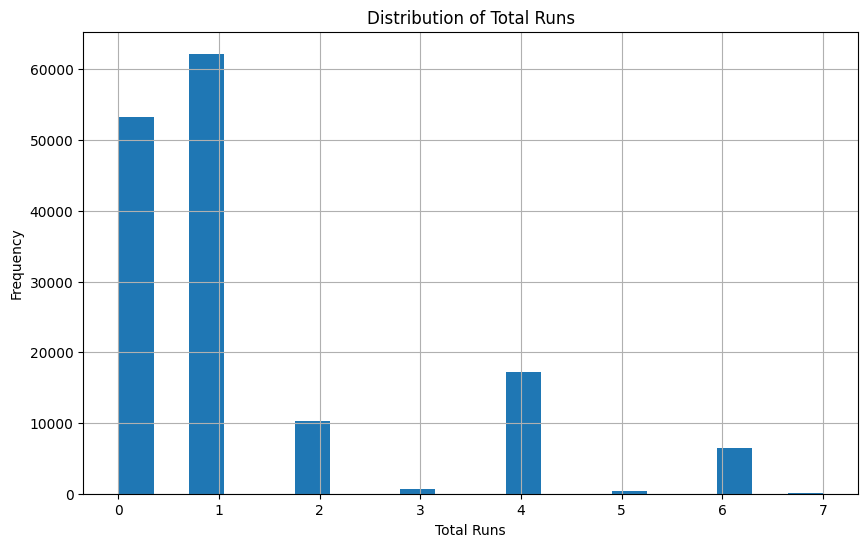

In [67]:
#histograms to visualize the distribution of numerical features
# Plotting histogram for total runs in deliveries table
plt.figure(figsize=(10, 6))
deliveries['total_runs'].hist(bins=20)
plt.title('Distribution of Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()


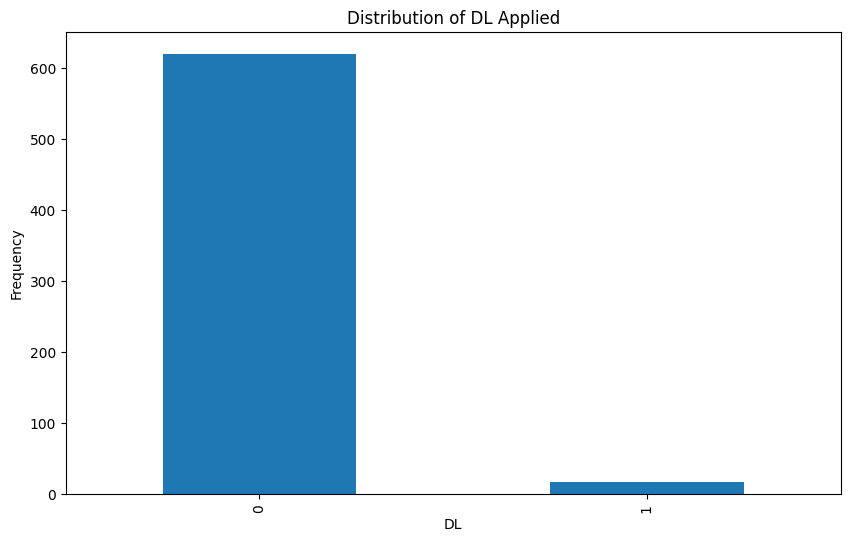

In [73]:
# Plot histogram for Checking in how many matches D/L applied
plt.figure(figsize=(10, 6))
matches.groupby('dl_applied').size().plot(kind='bar')
plt.title('Distribution of DL Applied')
plt.xlabel('DL')
plt.ylabel('Frequency')
plt.show()

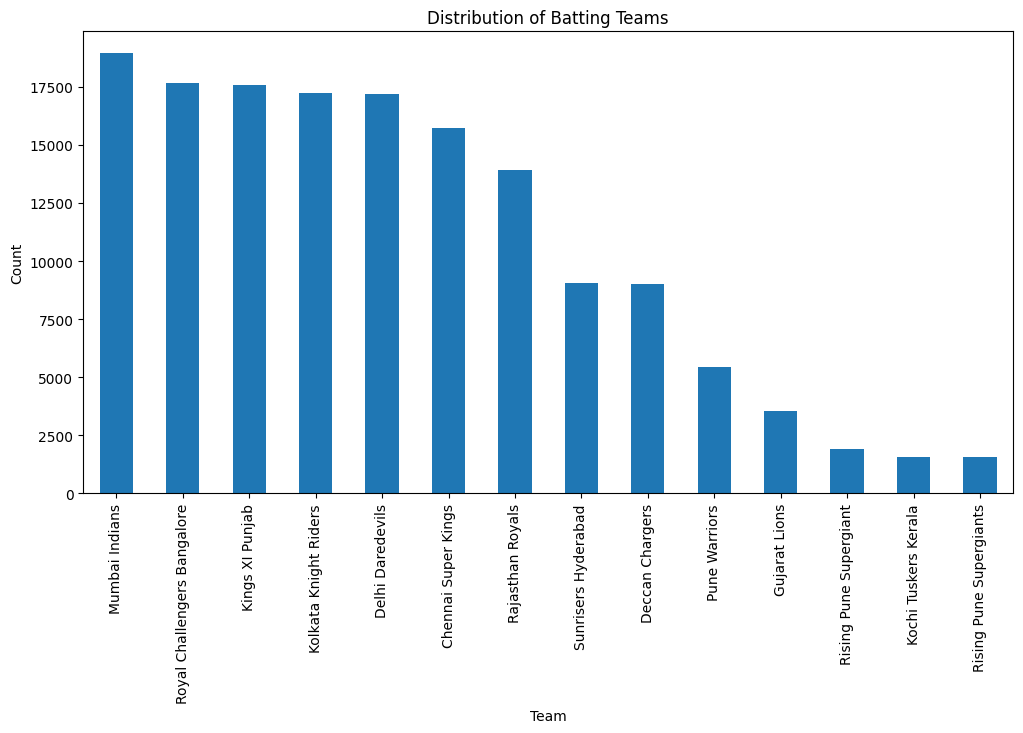

In [74]:
# Bar chart for batting teams in deliveries
plt.figure(figsize=(12, 6))
deliveries['batting_team'].value_counts().plot(kind='bar')
plt.title('Distribution of Batting Teams')
plt.xlabel('Team')
plt.ylabel('Count')
plt.show()




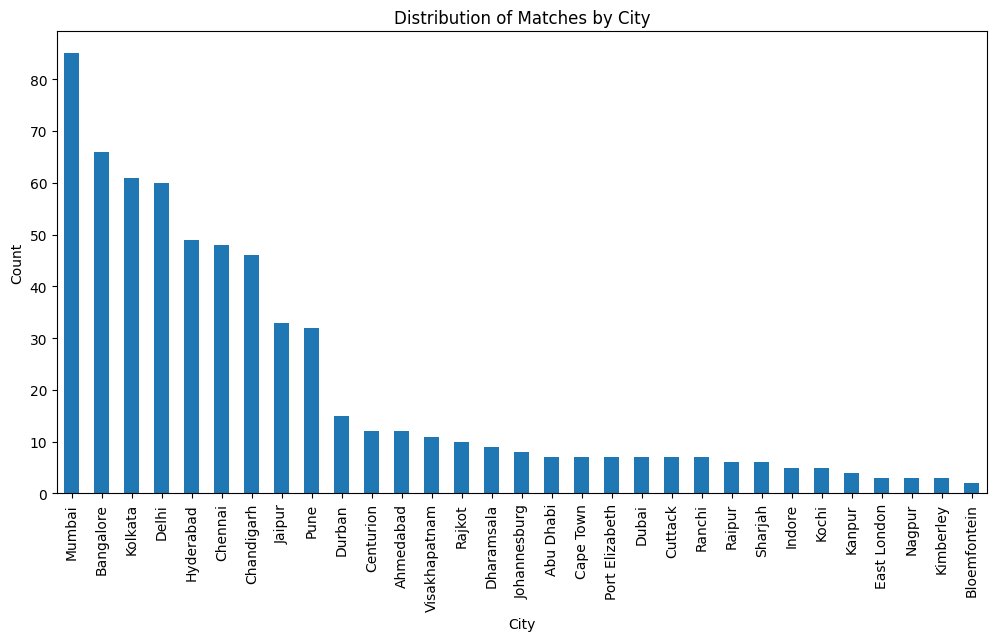

In [75]:
# Bar chart for cities in matches
plt.figure(figsize=(12, 6))
matches['city'].value_counts().plot(kind='bar')
plt.title('Distribution of Matches by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

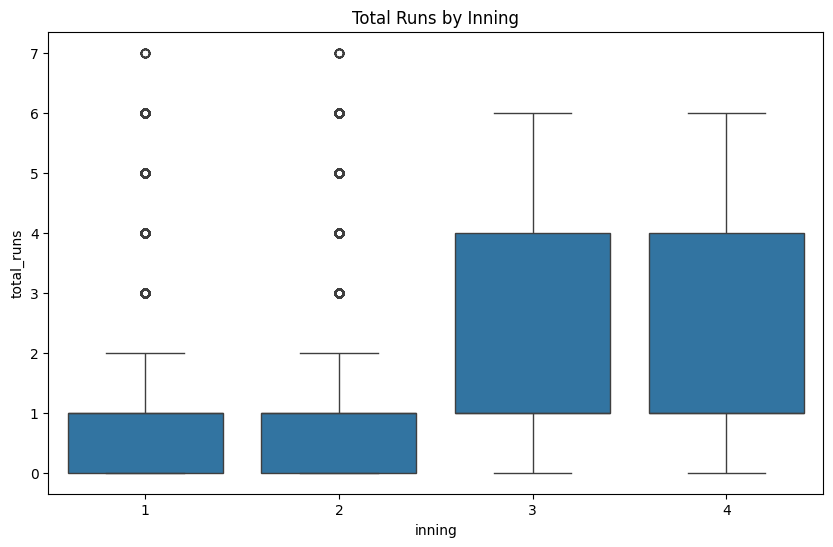

In [76]:
# Boxplot for total runs by innings
plt.figure(figsize=(10, 6))
sns.boxplot(x='inning', y='total_runs', data=deliveries)
plt.title('Total Runs by Inning')
plt.show()


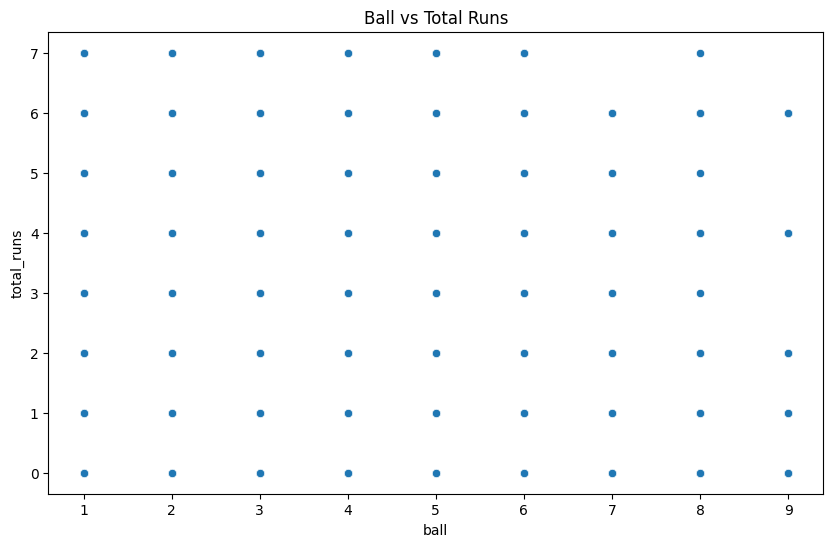

In [77]:
# Scatter plot between two variables (e.g., runs and ball)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ball', y='total_runs', data=deliveries)
plt.title('Ball vs Total Runs')
plt.show()



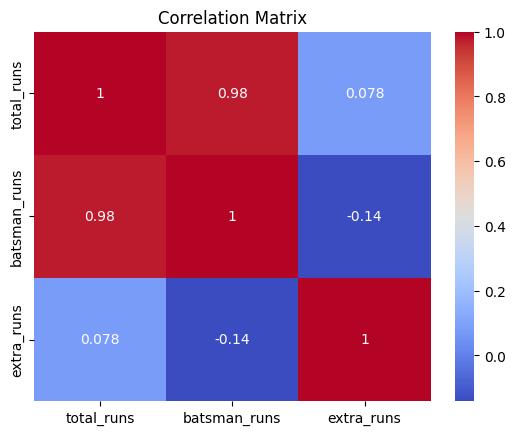

In [78]:
# Correlation matrix
correlation_matrix = deliveries[['total_runs', 'batsman_runs', 'extra_runs']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


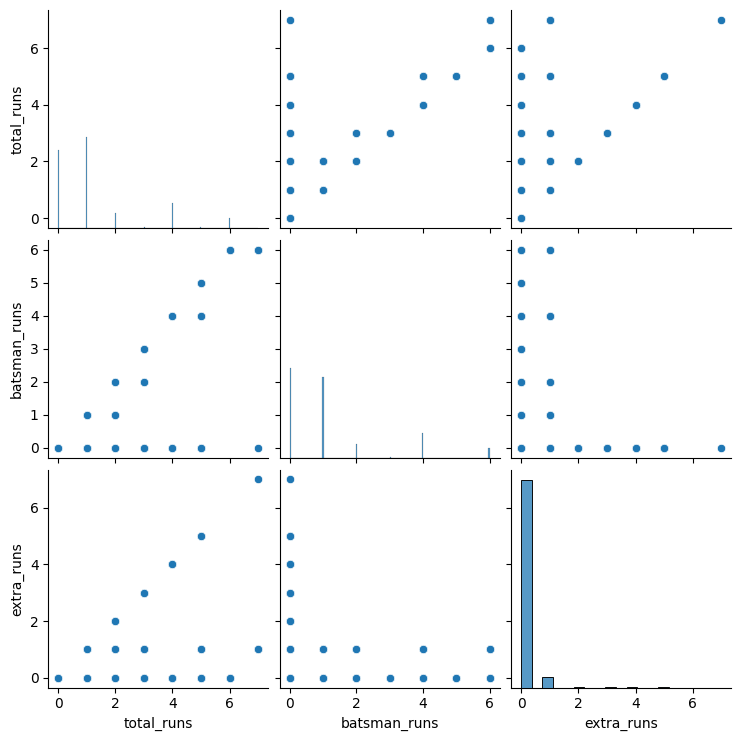

In [79]:
# Pairplot for numerical features
sns.pairplot(deliveries[['total_runs', 'batsman_runs', 'extra_runs']])
plt.show()




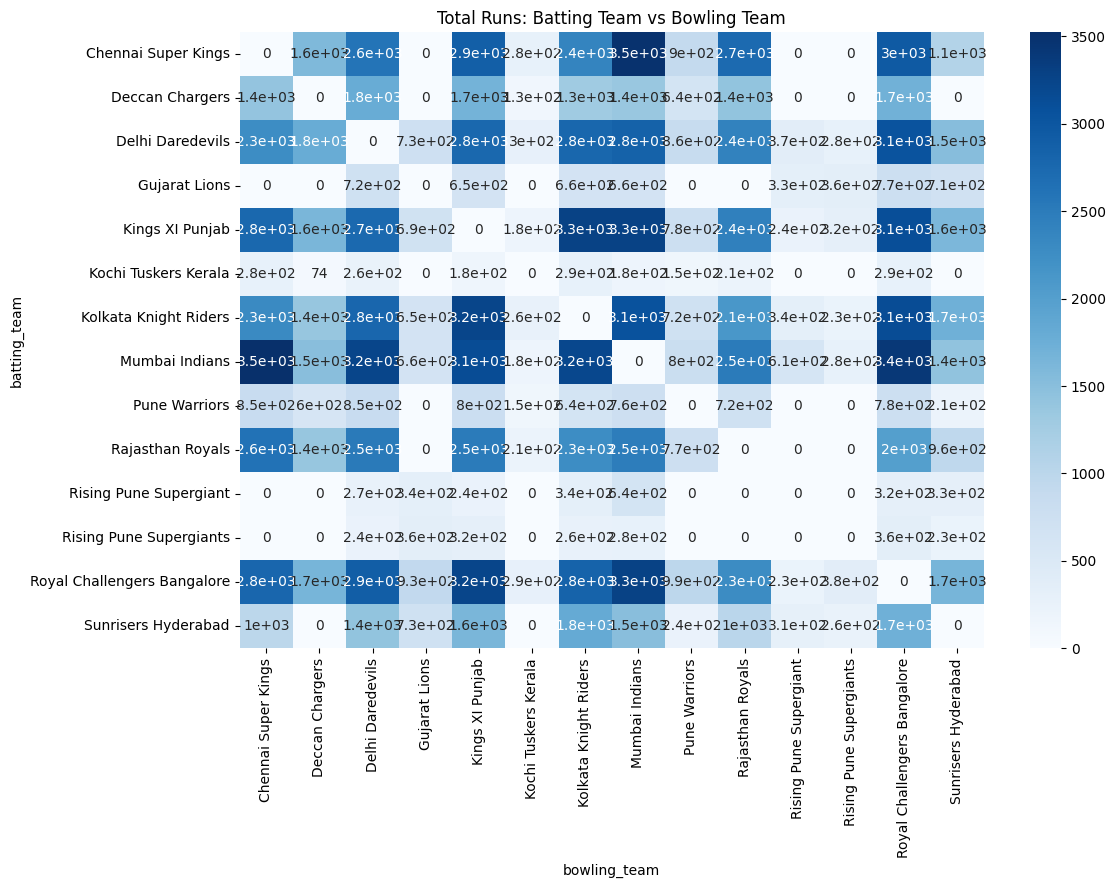

In [80]:
# Heatmap of batting team vs bowling team by total runs
team_runs = deliveries.groupby(['batting_team', 'bowling_team'])['total_runs'].sum().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(team_runs, cmap='Blues', annot=True)
plt.title('Total Runs: Batting Team vs Bowling Team')
plt.show()

QUESTIONS

How are total runs distributed per over across all matches? Are there specific overs with higher or lower scoring tendencies?

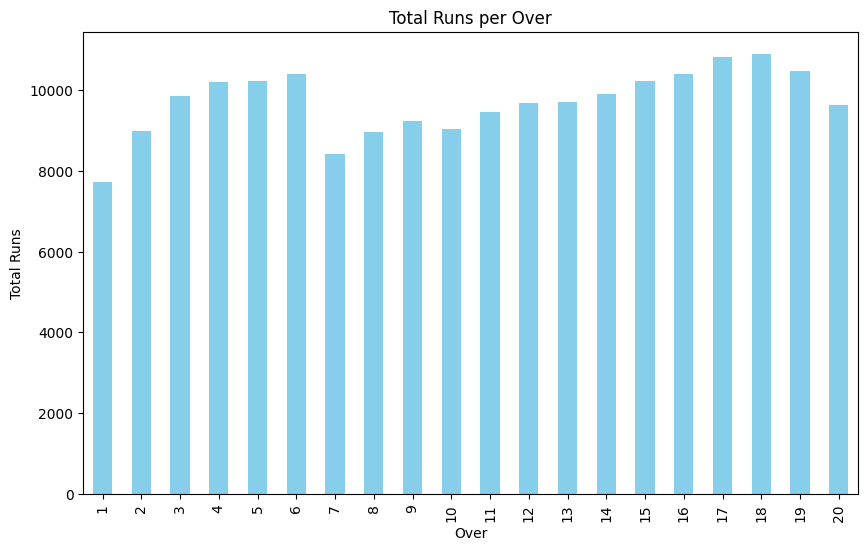

In [81]:
# Group by over and calculate total runs for each over
runs_per_over = deliveries.groupby('over')['total_runs'].sum()
plt.figure(figsize=(10, 6))
runs_per_over.plot(kind='bar', color='skyblue')
plt.title('Total Runs per Over')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.show()


How frequently do different batting teams hit boundaries (fours and sixes)? Do some teams rely more heavily on boundaries for scoring?

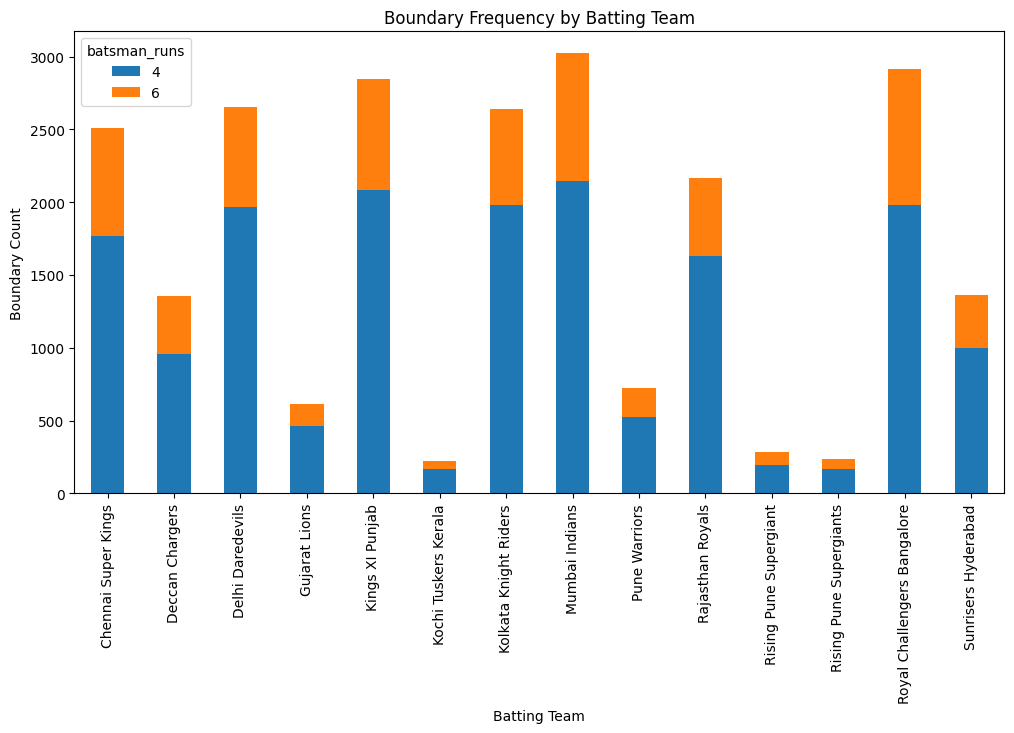

In [82]:
# Filter for fours and sixes
boundaries = deliveries[(deliveries['batsman_runs'] == 4) | (deliveries['batsman_runs'] == 6)]
boundaries_count = boundaries.groupby(['batting_team', 'batsman_runs']).size().unstack()
boundaries_count.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Boundary Frequency by Batting Team')
plt.xlabel('Batting Team')
plt.ylabel('Boundary Count')
plt.show()


Is there a difference in the distribution and types of extra runs conceded by various bowling teams?

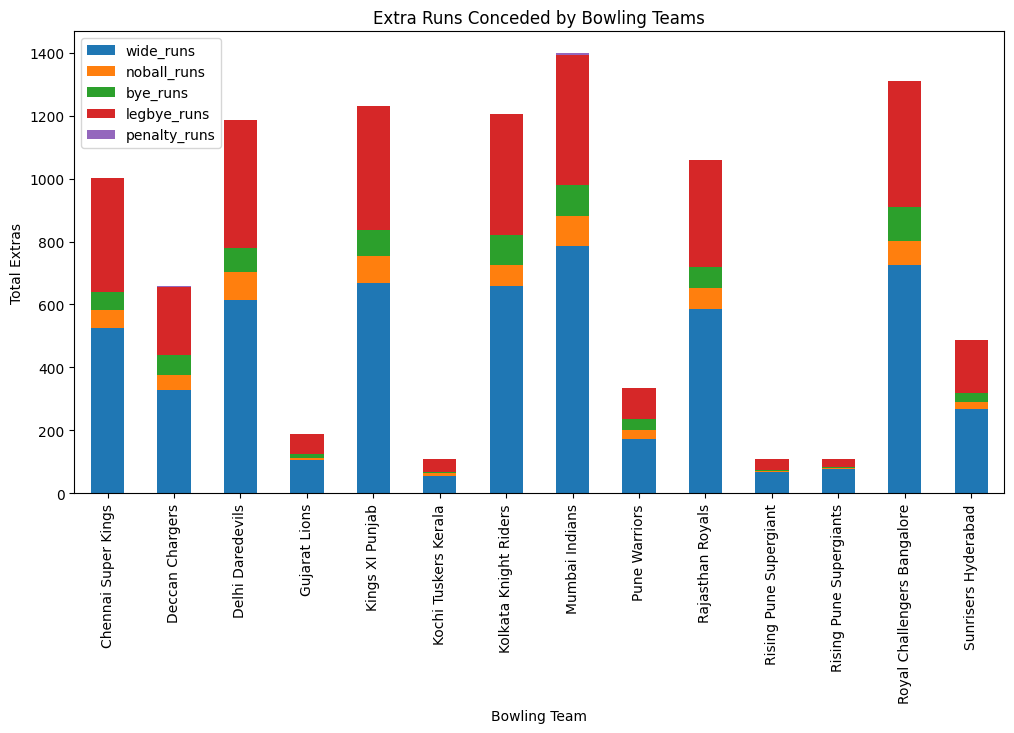

In [83]:
extras = deliveries.groupby('bowling_team')[['wide_runs', 'noball_runs', 'bye_runs', 'legbye_runs', 'penalty_runs']].sum()
extras.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Extra Runs Conceded by Bowling Teams')
plt.xlabel('Bowling Team')
plt.ylabel('Total Extras')
plt.show()


How do run rates change across different phases of the innings (e.g., powerplay, middle overs, death overs) for different teams?

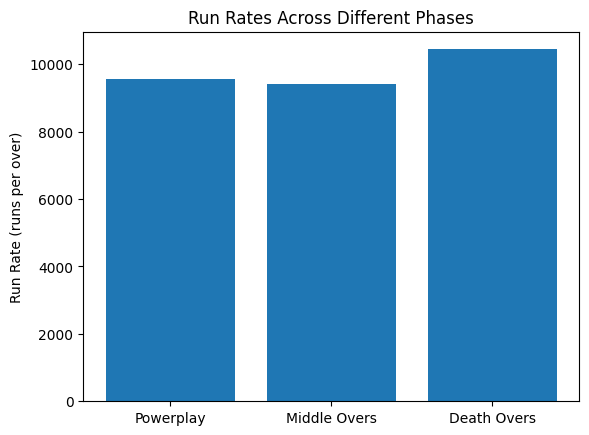

In [84]:
# Define phases of play
powerplay = deliveries[deliveries['over'] <= 6]
middle_overs = deliveries[(deliveries['over'] > 6) & (deliveries['over'] <= 15)]
death_overs = deliveries[deliveries['over'] > 15]

# Calculate run rates for each phase
phases = {'Powerplay': powerplay, 'Middle Overs': middle_overs, 'Death Overs': death_overs}
run_rates = {}
for phase, data in phases.items():
    total_runs = data['total_runs'].sum()
    total_overs = len(data['over'].unique())
    run_rates[phase] = total_runs / total_overs

plt.bar(run_rates.keys(), run_rates.values())
plt.title('Run Rates Across Different Phases')
plt.ylabel('Run Rate (runs per over)')
plt.show()


How do scoring patterns and run rates differ in super overs compared to regular overs?

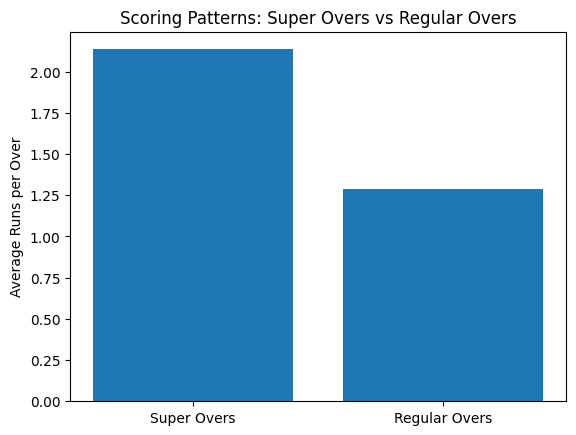

In [85]:
# Filter for super overs
super_overs = deliveries[deliveries['is_super_over'] == 1]
regular_overs = deliveries[deliveries['is_super_over'] == 0]

# Compare average run rate
super_over_run_rate = super_overs['total_runs'].mean()
regular_over_run_rate = regular_overs['total_runs'].mean()

plt.bar(['Super Overs', 'Regular Overs'], [super_over_run_rate, regular_over_run_rate])
plt.title('Scoring Patterns: Super Overs vs Regular Overs')
plt.ylabel('Average Runs per Over')
plt.show()


What is the distribution of different dismissal types (caught, bowled, LBW, etc.)? Are there any trends in how batsmen are getting out?

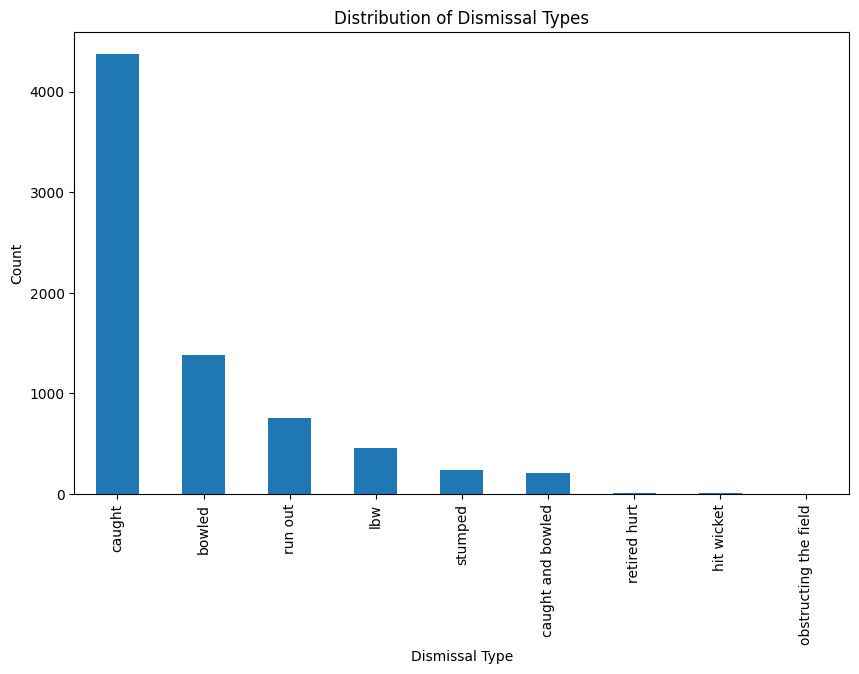

In [87]:
dis=deliveries[deliveries['dismissal_kind']!='No Dismissal']
dismissal_types = dis['dismissal_kind'].value_counts()
dismissal_types.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Dismissal Types')
plt.xlabel('Dismissal Type')
plt.ylabel('Count')
plt.show()


Which bowlers have the best performance in terms of wickets taken, economy rate, and bowling strike rate? What are their preferred dismissal methods?

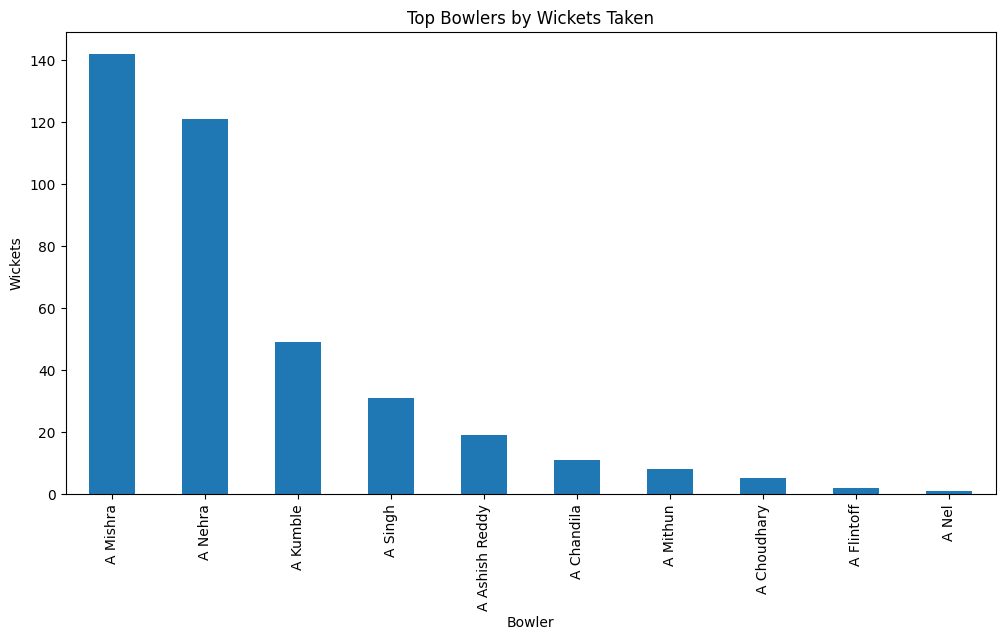

In [109]:
# Calculate wickets, economy rate, and strike rate for each bowler
bowlers_performance = deliveries[deliveries['player_dismissed']!='No Dismissal']
bowler_wickets = bowlers_performance.groupby('bowler').size()
bowler_runs_conceded = deliveries.groupby('bowler')['total_runs'].sum()
bowler_overs = deliveries.groupby(['bowler', 'over']).size().groupby('bowler').count()  # Approximating overs bowled

economy_rate = bowler_runs_conceded / bowler_overs
bowler_wickets.head(10).sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Top Bowlers by Wickets Taken')
plt.xlabel('Bowler')
plt.ylabel('Wickets')
plt.show()


Analyze the win-loss trends of each team across different seasons. Are there teams that have shown consistent improvement or decline?

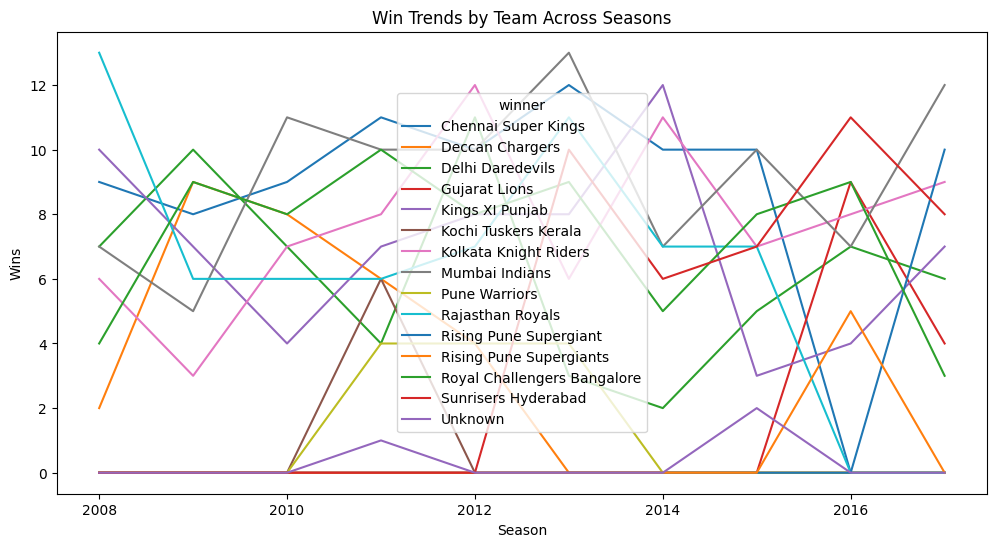

In [112]:
win_trends = matches.groupby(['season', 'winner']).size().unstack().fillna(0)
win_trends.plot(kind='line', figsize=(12, 6))
plt.title('Win Trends by Team Across Seasons')
plt.xlabel('Season')
plt.ylabel('Wins')
plt.show()


Which fielders contribute the most to dismissals through catches and run-outs?

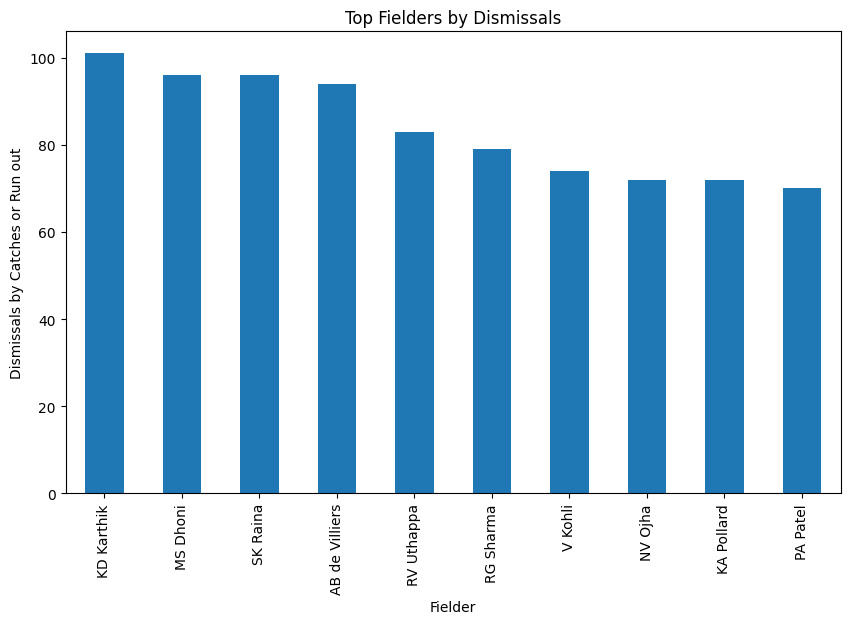

In [96]:
# Fielding performance
diss=deliveries[(deliveries['dismissal_kind']=='run out') | (deliveries['dismissal_kind']=='caught')]
fielder_dismissals = diss[diss['fielder'].notnull()]
fielding_contributions = fielder_dismissals.groupby('fielder').size()
fielding_contributions.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top Fielders by Dismissals')
plt.xlabel('Fielder')
plt.ylabel('Dismissals by Catches or Run out')
plt.show()


How are wickets distributed across overs in the matches? Are there specific overs where bowlers tend to be more successful?

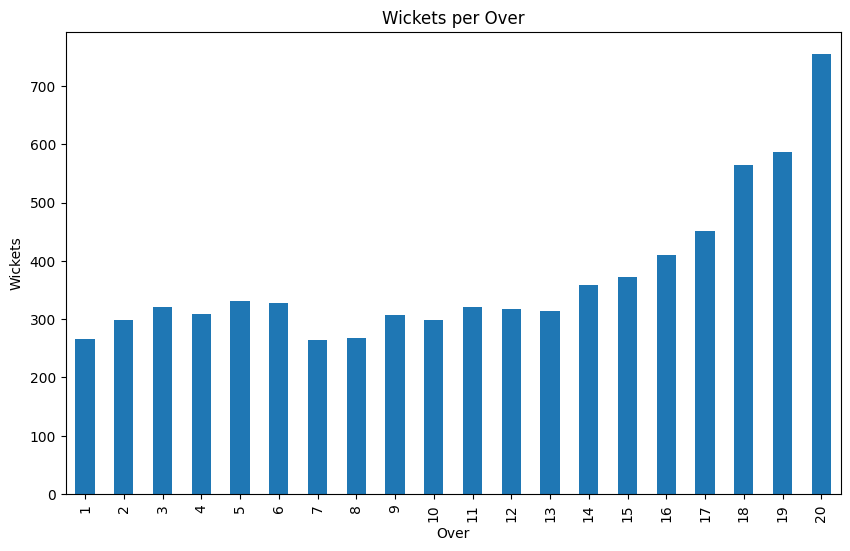

In [113]:
wickets_per_over = deliveries[deliveries['player_dismissed']!='No Dismissal'].groupby('over').size()
wickets_per_over.plot(kind='bar', figsize=(10, 6))
plt.title('Wickets per Over')
plt.xlabel('Over')
plt.ylabel('Wickets')
plt.show()


Analyze the bowling strength of teams based on metrics like economy rate, bowling strike rate, and performance in different phases of the match.

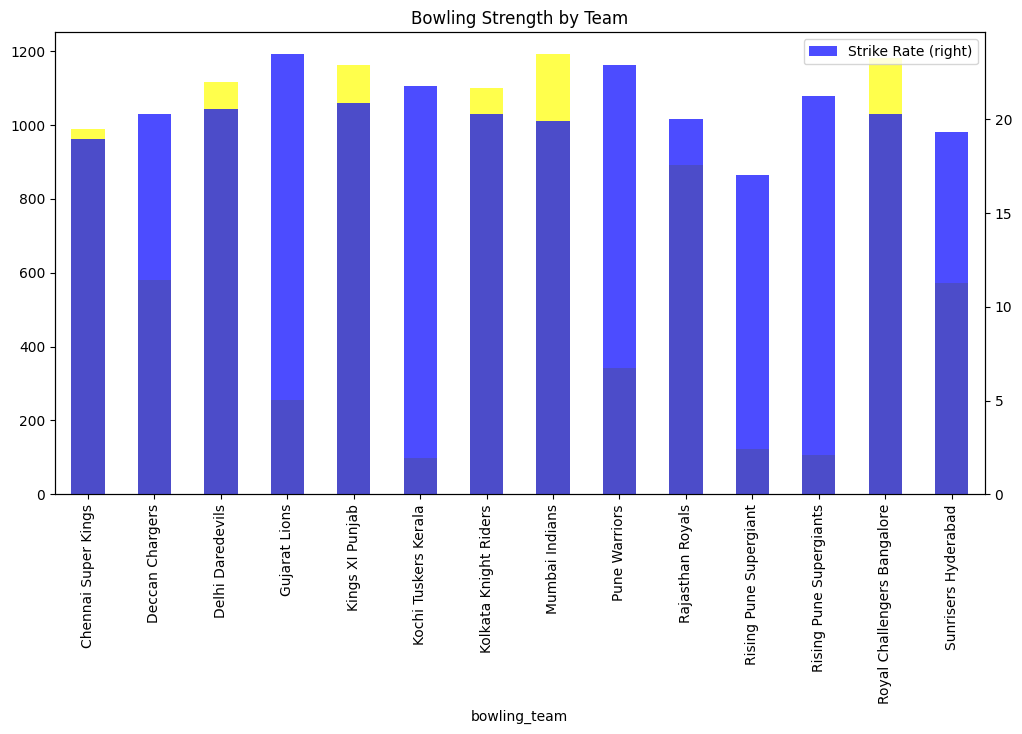

In [114]:
# Calculate total runs conceded, wickets taken, and overs bowled per team
runs_conceded = deliveries.groupby('bowling_team')['total_runs'].sum()
wickets_taken = deliveries[deliveries['player_dismissed']!='No Dismissal'].groupby('bowling_team').size()
overs_bowled = deliveries.groupby(['bowling_team', 'over']).size().groupby('bowling_team').count()

# Economy rate and strike rate
economy_rate = runs_conceded / overs_bowled
strike_rate = deliveries.groupby('bowling_team').size() / wickets_taken

# Plot economy rate and strike rate
plt.figure(figsize=(12, 6))
economy_rate.plot(kind='bar', color='yellow', alpha=0.7, label='Economy Rate')
strike_rate.plot(kind='bar', color='blue', alpha=0.7, secondary_y=True, label='Strike Rate')
plt.title('Bowling Strength by Team')
plt.xlabel('Team')
plt.legend()
plt.show()


What are the characteristics of successful batting partnerships in terms of runs scored and duration?

In [118]:
# Group by partnership (batsman and non_striker) and sum their runs and ball counts
partnerships = deliveries.groupby(['batsman', 'non_striker']).agg({'total_runs': 'sum', 'ball': 'count'}).reset_index()
partnerships.columns = ['Batsman', 'Non-Striker', 'Runs', 'Balls Faced']

# Sort partnerships by runs scored
top_partnerships = partnerships.sort_values('Runs', ascending=False).head(10).reset_index(drop=True)
top_partnerships


,Batsman,Non-Striker,Runs,Balls Faced
0,CH Gayle,V Kohli,1617,1006
1,DA Warner,S Dhawan,1420,935
2,V Kohli,CH Gayle,1185,967
3,AB de Villiers,V Kohli,1115,703
4,V Kohli,AB de Villiers,1097,736
5,RV Uthappa,G Gambhir,1077,743
6,S Dhawan,DA Warner,937,790
7,G Gambhir,RV Uthappa,829,682
8,DR Smith,BB McCullum,738,553
9,MEK Hussey,M Vijay,712,590


How do individual batsmen perform against specific bowlers? Are there any notable batsman-bowler matchups?

In [121]:
# Group by batsman and bowler to calculate runs, balls faced, and dismissals
batsman_bowler_matchup = deliveries.groupby(['batsman', 'bowler']).agg({'total_runs': 'sum', 'ball': 'count'}).reset_index()
batsman_bowler_matchup.columns = ['Batsman', 'Bowler', 'Runs', 'Balls Faced']

# Filter top matchups
top_matchups = batsman_bowler_matchup.sort_values('Runs', ascending=False).head(10).reset_index(drop=True)
top_matchups


,Batsman,Bowler,Runs,Balls Faced
0,V Kohli,A Mishra,156,95
1,SK Raina,PP Chawla,153,90
2,V Kohli,UT Yadav,144,83
3,DA Warner,P Kumar,141,92
4,SK Raina,Harbhajan Singh,138,125
5,KA Pollard,A Mishra,137,79
6,RG Sharma,PP Chawla,136,103
7,V Kohli,R Ashwin,136,101
8,V Kohli,DJ Bravo,134,91
9,G Gambhir,Z Khan,121,85


Do certain batsmen have a higher tendency to get dismissed in specific ways?

In [102]:
# Group by batsman and dismissal kind
dismissal_tendencies = deliveries[deliveries['player_dismissed'].notnull()].groupby(['batsman', 'dismissal_kind']).size().unstack(fill_value=0)
dismissal_tendencies.head()


dismissal_kind,No Dismissal,bowled,caught,caught and bowled,hit wicket,lbw,obstructing the field,retired hurt,run out,stumped
batsman,,,,,,,,,,
A Ashish Reddy,181,5,8,0,0,0,0,0,2,0
A Chandila,6,0,0,0,0,0,0,0,1,0
A Chopra,70,0,2,0,0,1,0,0,1,1
A Choudhary,18,0,1,0,0,0,0,0,1,0
A Flintoff,55,0,1,1,0,0,0,0,0,0


How does the presence of specific batsmen at the crease impact the batting team's run rate?

In [123]:
# Group by batsman and calculate total runs and balls faced
batsman_run_rate = deliveries.groupby('batsman').agg({'total_runs': 'sum', 'ball': 'count'}).reset_index()
batsman_run_rate['Run Rate'] = batsman_run_rate['total_runs'] / batsman_run_rate['ball'] * 6

# Sort by run rate
top_batsmen = batsman_run_rate.sort_values('Run Rate', ascending=False).head(10).reset_index(drop=True)
top_batsmen


,batsman,total_runs,ball,Run Rate
0,DL Chahar,14,6,14.000000
1,Umar Gul,44,19,13.894737
2,RS Sodhi,4,2,12.000000
3,KMDN Kulasekara,6,3,12.000000
4,ER Dwivedi,29,15,11.600000
5,BCJ Cutting,135,70,11.571429
6,CR Brathwaite,105,56,11.250000
7,AJ Tye,56,30,11.200000
8,Shahid Afridi,82,46,10.695652
9,AD Russell,615,350,10.542857


How have average run rates and scoring patterns evolved across different IPL seasons?

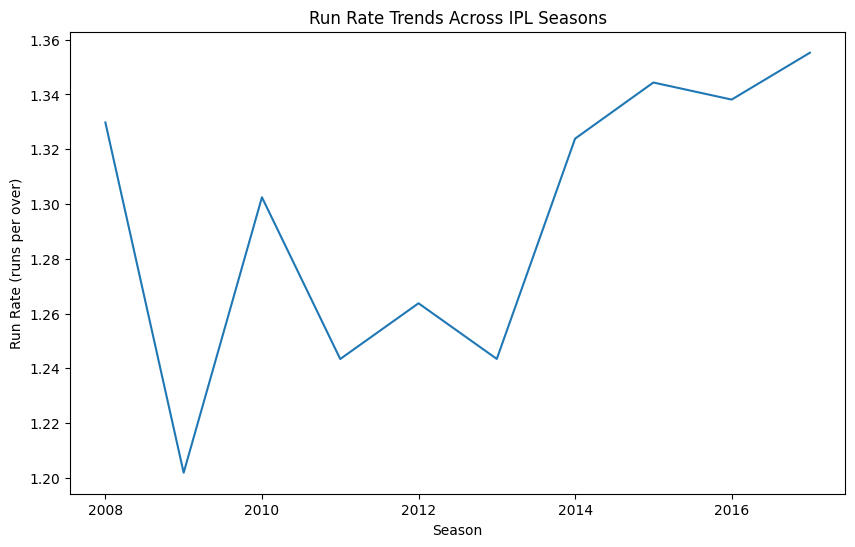

In [126]:
#First join both the tables then perform Group by season and calculate total runs and overs bowled
res=pd.merge(matches,deliveries,left_on='id', right_on='match_id', how='inner')
run_rate_by_season = res.groupby('season').agg({'total_runs': 'sum', 'over': 'count'}).reset_index()
run_rate_by_season['Run Rate'] = run_rate_by_season['total_runs'] / run_rate_by_season['over']

# Plot run rate trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='season', y='Run Rate', data=run_rate_by_season)
plt.title('Run Rate Trends Across IPL Seasons')
plt.xlabel('Season')
plt.ylabel('Run Rate (runs per over)')
plt.show()


Has the distribution of different dismissal types changed over the seasons?


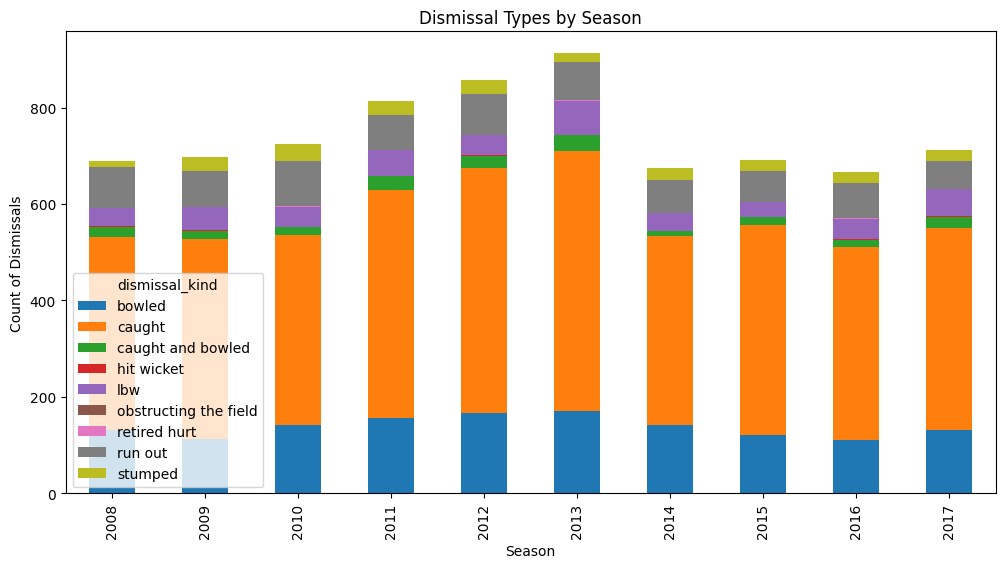

In [127]:
# Group by season and dismissal type
res1=pd.merge(matches,deliveries,left_on='id', right_on='match_id', how='inner')
dismissal_by_season = res1[res1['player_dismissed']!='No Dismissal'].groupby(['season', 'dismissal_kind']).size().unstack(fill_value=0)

# Plot dismissal type distribution
dismissal_by_season.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Dismissal Types by Season')
plt.xlabel('Season')
plt.ylabel('Count of Dismissals')
plt.show()


How do average runs scored and wickets taken per match differ across various venues?

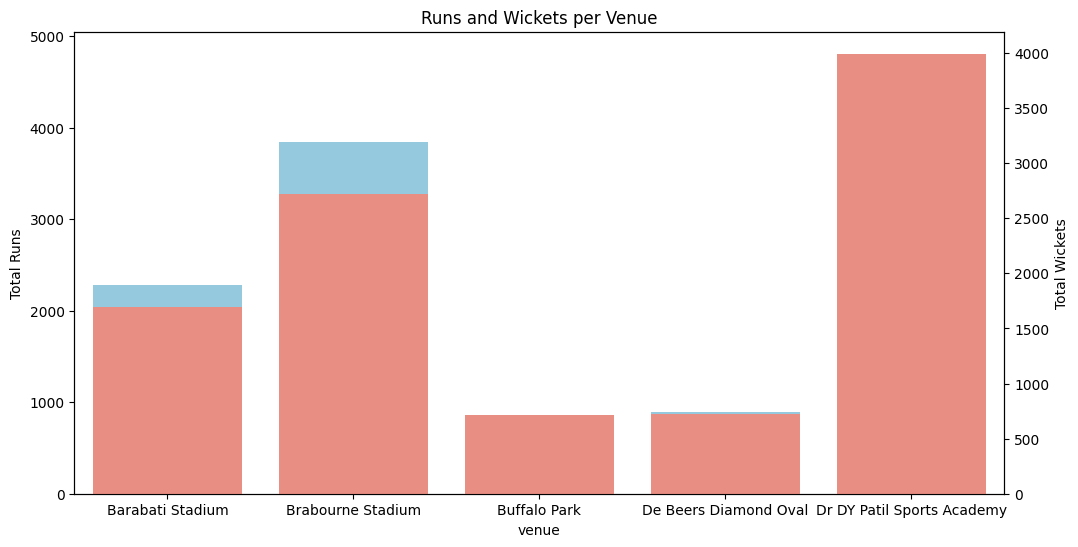

In [134]:
# Group by venue and calculate total runs and wickets
res2=pd.merge(matches,deliveries,left_on='id', right_on='match_id', how='inner')
runs_wickets_by_venue = res2.groupby('venue').agg({'total_runs': 'sum', 'player_dismissed': 'count'}).head(5).reset_index()

# Plot runs and wickets per venue
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
sns.barplot(x='venue', y='total_runs', data=runs_wickets_by_venue, ax=ax1, color='skyblue')
sns.barplot(x='venue', y='player_dismissed', data=runs_wickets_by_venue, ax=ax2, color='salmon')
plt.title('Runs and Wickets per Venue')
plt.xlabel('Venue')
ax1.set_ylabel('Total Runs')
ax2.set_ylabel('Total Wickets')
plt.show()


Is there a significant difference in batting team performance between the first and second innings?

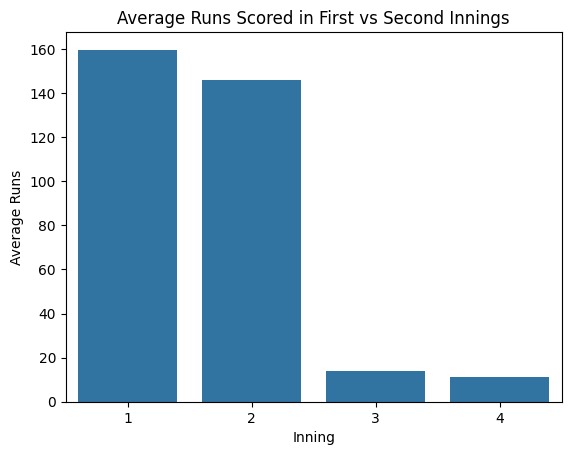

In [125]:
# Group by innings and calculate total runs and overs
runs_by_innings = deliveries.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()
innings_summary = runs_by_innings.groupby('inning').agg({'total_runs': 'mean'}).reset_index()

# Plot performance comparison
sns.barplot(x='inning', y='total_runs', data=innings_summary)
plt.title('Average Runs Scored in First vs Second Innings')
plt.xlabel('Inning')
plt.ylabel('Average Runs')
plt.show()


Analyze how the average win by runs has changed across seasons. Is there a trend towards higher or lower scoring matches?

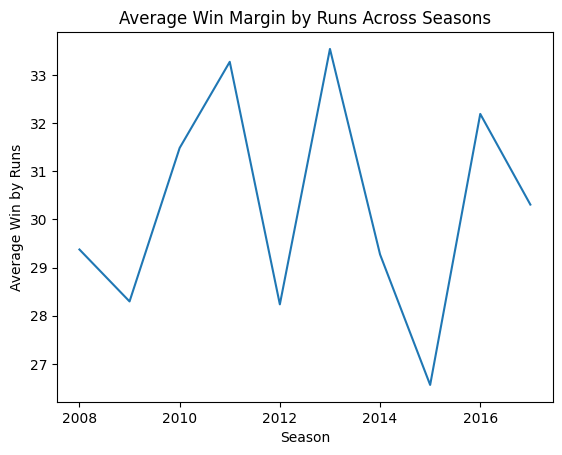

In [106]:
# Filter matches won by runs
matches_won_by_runs = matches[matches['win_by_runs'] > 0]
win_margin_by_season = matches_won_by_runs.groupby('season')['win_by_runs'].mean().reset_index()

# Plot average win margin by season
sns.lineplot(x='season', y='win_by_runs', data=win_margin_by_season)
plt.title('Average Win Margin by Runs Across Seasons')
plt.xlabel('Season')
plt.ylabel('Average Win by Runs')
plt.show()


INSIGHTS AND CONCLUSION

After Performing EDA(Exploratory Data Analysis) on the provided IPL data of different teams, I can conclude:-
1) Most of the matches played in Mumbai, Bangalore, Kolkata, Delhi.
2) Most of the matches get finisher properly with one winning team.
3) Mostly Batsman got dismissed by getting caught or bowled and very few got dismissed by hit wicket or obstructing the field.
4) There are very few matches in which D/L method get applied due to some issue.
5) Most of the runs scored in powerplay or Death overs as compared to Middle overs, because of this run rate is also high in death overs and  also number of wickets falls also high in death overs.
6) Most of the preferred hitting 4's over 6's in early's time.
7) Wide runs is most extra runs given by bowlers.
8) In super overs the average runs scored is more as compared to regular overs.
9) A mishra and A nehra are the most successfull bowlers.
10) V kohli and C Gayle are very consistent in scoring runs as they have highest partnership runs.
11) As compared to start of IPL now the runrate is much hihger.
12) In first innings the batsman played freely that's why in 1st innings average runs scored is more.

Also IPL started in 2008, after that the craze for IPL is getting more and more. IPL is giving more oppurtunuties to players for showcasing their
skills. The Overall summary I can say after performing analysis is as compared to before the play style of players has changed a lot. Now they have adapt aggresive play stlye because of the most of the batsman's strike rate is more than 200 and on the other hand the bowler's economy is very high. The average number of runs getting scored in each overs is more than 10.